## 感知机

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

dataset = datasets.load_iris()

type(dataset)

sklearn.utils.Bunch

In [58]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [59]:
X = dataset.data[..., :2]
y = dataset.target
type(X)

numpy.ndarray

No handles with labels found to put in legend.


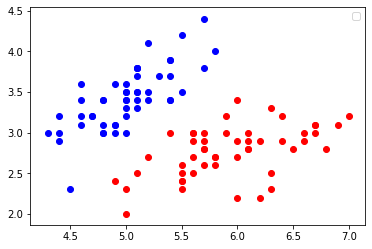

In [62]:
plt.scatter(X[y==1, 0], X[y==1, 1], color="red")
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.show()

In [63]:
# 筛选出y==0和y==1
X = X[y<2]
y = y[y<2]

X.shape, y.shape

((100, 2), (100,))

In [64]:
y[y==0] = -1

In [65]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [66]:
def sign (X, w, b):
    return X.dot(w) + b

In [70]:
def train(X_train, y_train, lr=0.01):
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0
    
    Flag = True
    while Flag:
        error_count = 0
        for i in range(m): # 遍历每一个样本
            x = X_train[i]
            y = y_train[i]
            
            if y*sign(x, w, b) <= 0:
                w = w + lr*np.dot(y, x)
                b = b + lr*y
                error_count += 1
        
        if error_count == 0:
            Flag = False
    return w, b
                

In [71]:
w, b = train(X, y)

In [74]:
w, b

(array([ 0.79 , -1.007]), -1.2400000000000009)

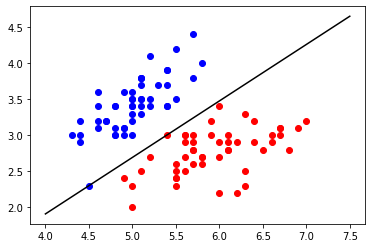

In [79]:
plot_x = np.linspace(4, 7.5, 100)

# w0*x[0] + w1*x[1] + b = 0
# x[1] = (b-w0*x[0])/w1
plot_y = -w[0]*plot_x/w[1] - b/w[1]

plt.scatter(X[y==1, 0], X[y==1, 1], color="red")
plt.scatter(X[y==-1, 0], X[y==-1, 1], color="blue")
plt.plot(plot_x, plot_y, color="black")
plt.show()
